In [2]:
import numpy as np
import matplotlib.pyplot as plt
import irf
from irf.ensemble import wrf as rfc
from irf.utils import (
    get_prevalent_interactions,
    visualize_impurity_decrease,
    visualize_prevalent_interactions,
    get_filtered_feature_paths
)
import rpy2.robjects as robjects
from irf.irf_jupyter_utils import draw_tree
import utils

In [3]:
mask = ["zld", "bcd", "bcd", "cad", "D", "da", "dl", "ftz", "gt", "h",
         "h", "hb", "hb", "hkb", "hkb", "hkb", "kni", "kni", "kr", "kr", 
         "mad", "med", "prd", "prd", "run", "run", "shn", "shn", "slp1", "sna", 
         "sna", "tll", "twi", "twi", "z"]
mask = {x:y for x, y in enumerate(mask)}

# Simulate the settings in the signed iRF paper

## Simulation 1: and rule

In [6]:
X.shape

(5856, 35)

In [5]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='and')

In [4]:
interact_new

[[(0, 'R'), (4, 'R'), (18, 'R'), (29, 'R')]]

In [6]:
rf = rfc()

In [7]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

<BarContainer object of 35 artists>

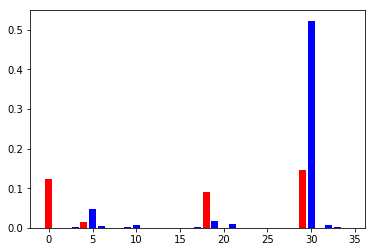

In [8]:
color = ['b' for x in range(35)]
for x in [0, 4, 18, 29]:
    color[x] = 'r'
plt.bar(np.arange(35), rf.feature_importances_, color=color)

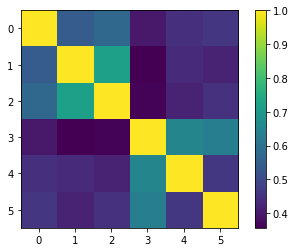

In [9]:
# look at the correlation between y_train and different features
plt.imshow(np.corrcoef(np.vstack([X[:,[0, 4, 18, 29, 30]].T, y.T])))
plt.colorbar()
plt.show()

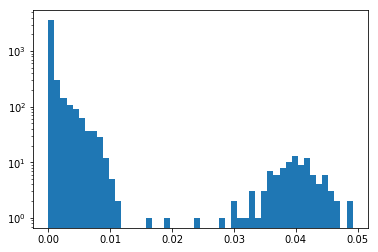

In [10]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [11]:
rf.n_paths

4827

In [12]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(
    rf,
    impurity_decrease_threshold=0.001,
    min_support=100,
    signed=True,
    weight_scheme="depth",
    mask=mask,
)

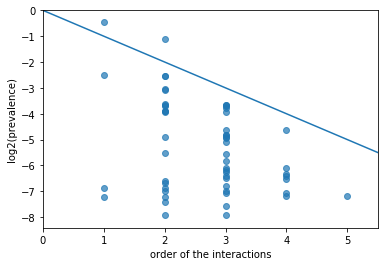

In [13]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [14]:
list(prevalence.items())[:20]

[((('sna', 'R'),), 0.739999999999999),
 ((('sna', 'L'), ('sna', 'R')), 0.4678320312499978),
 ((('kr', 'R'), ('sna', 'L'), ('sna', 'R'), ('zld', 'R')), 0.0403124999999998),
 ((('sna', 'L'), ('sna', 'R'), ('zld', 'R')), 0.07859374999999945),
 ((('kr', 'R'), ('sna', 'L'), ('sna', 'R')), 0.07828124999999965),
 ((('kr', 'L'), ('sna', 'L'), ('sna', 'R')), 0.07683593749999974),
 ((('sna', 'L'), ('sna', 'R'), ('zld', 'L')), 0.07359374999999983),
 ((('sna', 'R'), ('zld', 'R')), 0.17189453124999962),
 ((('sna', 'R'), ('zld', 'L')), 0.1718945312499993),
 ((('kr', 'R'), ('sna', 'R'), ('zld', 'R')), 0.06568908691406208),
 ((('da', 'L'), ('kr', 'R'), ('sna', 'L'), ('sna', 'R'), ('zld', 'R')),
  0.006933593749999996),
 ((('kr', 'L'), ('sna', 'L'), ('sna', 'R'), ('zld', 'R')),
  0.014492187500000002),
 ((('kr', 'L'), ('sna', 'R')), 0.11978576660156197),
 ((('kr', 'R'), ('sna', 'L'), ('zld', 'R')), 0.04093749999999979),
 ((('kr', 'R'), ('sna', 'R')), 0.11835998535156202),
 ((('da', 'R'), ('sna', 'L'), 

In [15]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new")

array([0.25, 0.25, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75,
       0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75])

## Simulation 2: OR rule

In [17]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='or')

In [18]:
rf = rfc()

In [19]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

In [20]:
interact_new

[[(4, 'R'), (18, 'R'), (0, 'L'), (29, 'L')],
 [(4, 'L'), (18, 'L'), (0, 'R'), (29, 'R')]]

<BarContainer object of 35 artists>

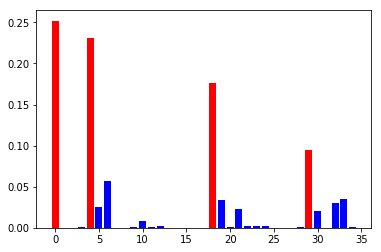

In [21]:
color = ['b' for x in range(35)]
for x in [4, 18, 0, 29]:
    color[x] = 'r'
plt.bar(
    np.arange(35),
    rf.feature_importances_,
    color = color,
)

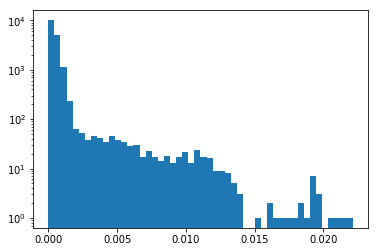

In [22]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [23]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=1e-3, min_support=500, signed=True, mask=mask)

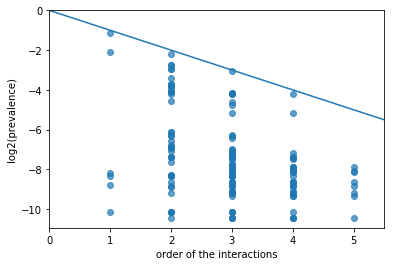

In [24]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [25]:
[[(mask[x[0]], x[1]) for x in interact] for interact in interact_new]

[[('D', 'R'), ('kr', 'R'), ('zld', 'L'), ('sna', 'L')],
 [('D', 'L'), ('kr', 'L'), ('zld', 'R'), ('sna', 'R')]]

In [26]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[((('D', 'R'), ('kr', 'R'), ('zld', 'L')), 0.12203125000000259),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'L'), ('zld', 'L')), 0.0533203125000007),
 ((('kr', 'R'), ('zld', 'L')), 0.21968750000000722),
 ((('kr', 'R'),), 0.4498437500000162),
 ((('D', 'L'), ('kr', 'L'), ('sna', 'R'), ('zld', 'R')), 0.027617187499999852),
 ((('kr', 'L'), ('sna', 'R')), 0.14953186035156218),
 ((('kr', 'R'), ('sna', 'L'), ('zld', 'L')), 0.05675781250000078),
 ((('kr', 'L'), ('sna', 'R'), ('zld', 'R')), 0.05671874999999982),
 ((('D', 'R'), ('kr', 'R')), 0.14671875000000523),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'L')), 0.05363281250000066),
 ((('D', 'R'), ('sna', 'L'), ('zld', 'L')), 0.0533203125000007),
 ((('D', 'R'), ('zld', 'L')), 0.1295312500000041),
 ((('sna', 'R'), ('zld', 'L')), 0.12755449295043908),
 ((('D', 'L'), ('kr', 'L'), ('sna', 'R')), 0.040820312499999845),
 ((('D', 'R'), ('dl', 'R'), ('kr', 'R'), ('sna', 'L'), ('zld', 'L')),
  0.00418011188507079),
 ((('D', 'L'), ('sna', 'R'), ('zld', 'R')), 0.036523

In [27]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new")

array([0.75, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  ])

## Simulation 3: Add rule

In [29]:
X, y, interact_new = utils.load_data(i=0, name='Enhancer_new', rule='add')

In [30]:
rf = rfc()

In [31]:
rf.fit(X, y, keep_record=False)

wrf(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini',
    max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None,
    min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100,
    n_jobs=None, oob_score=False, random_state=None, verbose=0,
    warm_start=False)

In [41]:
[[(mask[x[0]], x[1]) for x in interact] for interact in interact_new]

[[('D', 'R'), ('gt', 'R'), ('kr', 'R')],
 [('zld', 'R'), ('sna', 'R'), ('twi', 'R')]]

<BarContainer object of 35 artists>

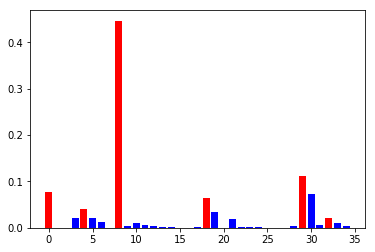

In [34]:
color = ['b' for x in range(80)]
for x in [4, 8, 18] + [0, 29, 32]:
    color[x] = 'r'
plt.bar(np.arange(35), rf.feature_importances_, color=color)

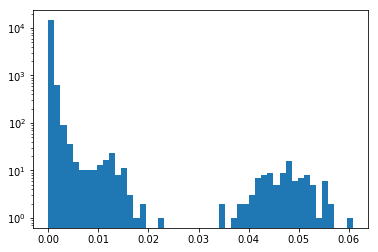

In [35]:
#visualize the impurity decrease of the rf model
visualize_impurity_decrease(rf, xscale='linear', bins=50)

In [36]:
#preprocess compute the prevalence
prevalence = get_prevalent_interactions(rf, impurity_decrease_threshold=0.001, min_support=2000, signed=True, mask=mask)

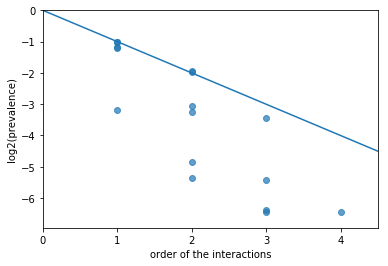

In [37]:
#visualize the interaction plot
visualize_prevalent_interactions(prevalence=prevalence)

In [38]:
#visualize find out the most prevalent interactions
list(prevalence.items())[:20]

[((('gt', 'R'), ('sna', 'L')), 0.2597558593750042),
 ((('gt', 'R'), ('sna', 'R')), 0.2524368667602524),
 ((('gt', 'R'),), 0.4981250000000093),
 ((('gt', 'L'),), 0.49812499999999704),
 ((('gt', 'R'), ('kr', 'R'), ('sna', 'L')), 0.09253005981445384),
 ((('sna', 'L'),), 0.44593750000000815),
 ((('sna', 'R'),), 0.4363333511352518),
 ((('gt', 'R'), ('kr', 'R')), 0.11903396606445373),
 ((('D', 'R'), ('gt', 'R'), ('kr', 'R'), ('sna', 'L')), 0.011434173583984323),
 ((('kr', 'R'), ('sna', 'L')), 0.10476638793945368),
 ((('D', 'R'), ('gt', 'R'), ('sna', 'L')), 0.023450164794921815),
 ((('D', 'R'), ('gt', 'R'), ('kr', 'R')), 0.01206893920898432),
 ((('D', 'R'), ('kr', 'R'), ('sna', 'L')), 0.011590423583984325),
 ((('D', 'R'), ('gt', 'R')), 0.03466110229492184),
 ((('D', 'R'), ('sna', 'L')), 0.02440719604492181),
 ((('zld', 'R'),), 0.11046539306640574)]

In [40]:
utils.evaluate_model(y_true=interact_new, y_pred=list(prevalence.keys()), name="Enhancer_new")

array([0.        , 0.        , 0.16666667, 0.16666667, 0.16666667,
       0.33333333, 0.33333333, 0.5       , 0.5       , 0.5       ,
       0.5       , 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.66666667])